# **Introduction**
 
Naive Bayes classifier is a straightforward machine learning classification algorithm based on the Bayes theorem. This classifier could be used in many classification tasks like filtering spams and classifying documents.

This algorithm is called naive as it assumes that the features used in predicting the target in machine learning tasks are strongly independent of each other. 

 

# **Contents**

1. Conditional probability and Bayes rule
2. Naive Bayes algorithm intuition and how to use it 
3. Types of Naive Bayes algorithm
4. Example of GaussianNB classifier
5. Advantages and disadvantages of the classifier

# **Conditional probability**

What is meant by P(A|B) is that we are computing the probability of event A given that event B has already happened.

# **Bayes Rule**

It is a way to compute P(y|X) using P(X|y) known from the dataset.
Assume instead of x,y we have the symbols B,A so the Bayes rule is computed as follows :
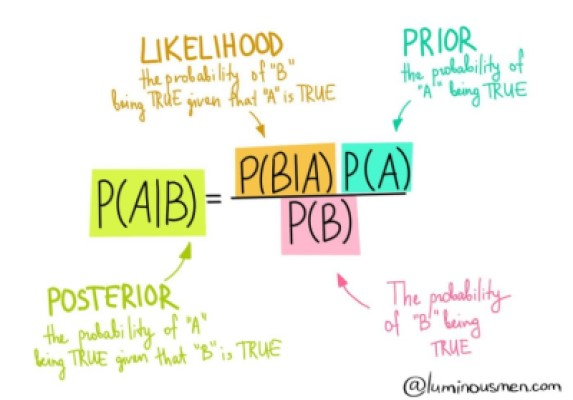
**so we have :**
1. P(A|B) which is called the posterior
2. P(B|A)which is called the likelihood
3. P(A) which is called the prior
4. P(B) which is called the evidence 

# **How does it work**

This algorithm, as mentioned above, depends on Bayes theorem.
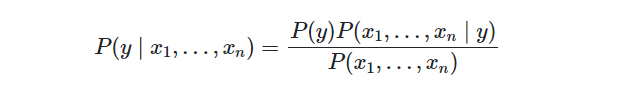

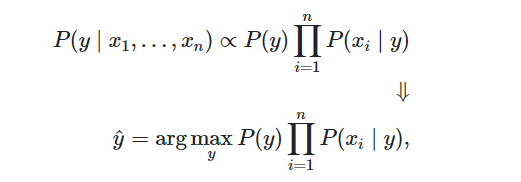

As the classifier assumes the independency among the features the first formula can be written as:
* **P(y|X1,X2,...Xn)=(P(y)*P(X1|y)*P(X2|y)....P(Xn|y))/(P(X1)*P(X2)...*P(Xn))**

The Probabilities in the RHS can be calculated from the data set as we will see in the coming example.If we have multiple classes the above formula is repeated for each class and the predicted class is the one with max probability 

so let's take a simple example to understand how the algorithm work.

Assume a simple Animal data with all binary features .


Imagine we have a data set consists of 900 instances which belong to three classes of Animals (Dog,Bird,Fish).
The numbers of animals for each class are 300 (300 dogs,300 birds,300 fishes).

The features of your data are (Sharp_teeth,Fly,Swim,Green) each feature indicates if an animal have a specific ability or color. 
For example the Fly feature if it contains the value 1 it indicates that animal can fly and vice versa.

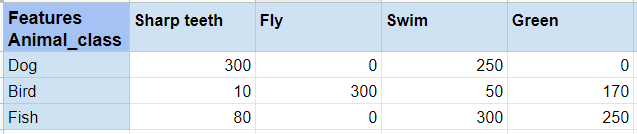

This small table illustrates that we have all dogs with sharp teeth , none of them can fly ,250 of them can swim and none of them have green colors.

And the same applies on the other two animals.


Assume you are predicting the animal for the following features (swim=1,green=1).


Then we need to compute P(Animal|swim,green) for each animal class we have.

P(Dog|Swim,Green)=P(Swim|Dog)* P(Green|Dog)* P(Dog) / (P(Swim)* P(Green))


From the table above we can get our required probabilities :

**P(Swim|Dog)=250/300=0.833 , P(Green|Dog)=0 ,P(Dog)=300/900 =0.333**

**P(Swim|Bird)=50/300=0.167 , P(Green|Bird)=170/300=0.567 , P(Bird)=300/900=0.333**

**P(Swim|Fish)=1 , P(Green|Fish)=250/300=0.833 , P(Fish)=300/900=0.333**

And there is no need to compute P(Swim,Green) as it is constant for the three classes .

Then we can finally obtain our P for the classes
P(Dog|Swim,Green)=P(Swim|Dog)* P(Green|Dog)* P(Dog) / P(Swim,Green)=0.833*0*0.333/P(Swim,Green)=0

P(Bird|Swim,Green)=P(Swim|Bird)* P(Green|Bird)* P(Bird) / P(Swim,Green)=0.167*0.567*0.333/P(Swim,Green)=0.0315 / P(Swim,Green)

P(Fish|Swim,Green)=P(Swim|Fish)* P(Green|Fish)* P(Fish) / P(Swim,Green)=1.00*0.833*0.333/ P(Swim,Green)=0.277 / P(Swim,Green)

When we compare the three probabilities we can see that P(Fish|Swim,Green) is the largest one so **Fish** is our predicted animal.

# **Laplace Estimation**

In the above Example The value of the probability that you get a green color, given that the animal you have is a Dog , is obviously zero.

This makes the entire probability P(Dog|Swim,Green) zero. This makes sense but when you are dealing with a larger number of features it does not make sense that one feature probability makes the probability of the class equal to zero. so in our case the value of the green dogs could be increased by a small value (usually 1) so P(Dog|Swim,Green) is not zero anymore.

This operation is called laplace estimation and Sklearn applies this smoothing technique by default when you train a Naive Bayes classifier.

# **Types of Naive Bayes**


**1. Multinomial Naive Bayes**
  
This type is usually used in document classification to determine if the document belongs to a specific category (Sports,Politics,Economy...etc).

The features used are the words and the document and their occurrence frequencies in the document.

**2. Bernouli Naive Bayes**  

This type is is similar to the multinomial naive Bayes classifier but with boolean features. For example if a word occurs in a document or not.

**3. Gaussian Naive Bayes**


In the above example with animal data we dealt with boolean features but what if we have continuous data ? Here Gaussian Naive classifier comes into mind.
in this classifier features are assumed to follow Gaussian (Normal) distribution with the following probability formula
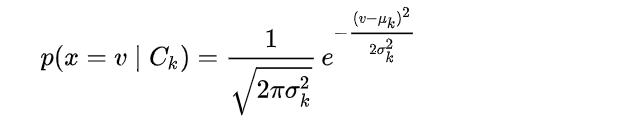  
  
Values for the feature x are sampled according to the each class ( x belongs to c1,c2..ck) then the mean mu_y  and the variance  sigma_y^2 are computed for x in each class.

Now for better understanding of the topic let's have a complete example in which we will use the Gaussian Naive Classifier 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sns.set()
%matplotlib inline
import os


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


First let's explore our dataset .

In this example the iris dataset is used to illustrate how our classifier works. The dataset contains 150 data instances and each instance is described by 5 features which are (sepal_length,sepal_width,petal_length,petal_width,species). Our target would be predicting which species each instance belongs to.





In [ ]:
iris = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')


print ("Number of instances ::", iris.shape[0])
print("Number of features ::", iris.shape[1])
print("Different species :: ",iris['species'].unique())


In [ ]:
species_num = {'Iris-setosa' : 1, 'Iris-versicolor' : 2, 'Iris-virginica' : 3 }
iris['species'] = iris['species'].map(species_num)


iris.head()

Before spliting our data and train our model ,let's have a look on how the classes are distributed for each pair of features.

In [ ]:
sns.pairplot(iris, hue = "species")

In the following heatmap we can get an idea about the correlations between the features .

In [ ]:
corr = iris.corr()

fig, axis = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)


In [ ]:
#Here we split the date for training and testing
X=iris.drop('species',axis=1)
y=iris['species']
train_X,test_X,train_y,test_y=train_test_split(X,y)

Here we create our gaussian naive bayes classifier as the features are represented with cont. values.
Then we train our model with x and y training sets. After that we predict the species for the x_test data.

In [ ]:

GNB=GaussianNB()
GNB.fit(train_X,train_y)
pred_y=GNB.predict(test_X)

print("Accuracy : {}".format(GNB.score(test_X,test_y)))


Now we create our confusion matrix to see our predicted y values vs the actual values of the y_test dataset

In [ ]:
mat=confusion_matrix(pred_y,test_y)

species = np.unique(pred_y)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('Truth')
plt.ylabel('Predicted')

# **The Advantages and Disadvantages of Naive Bayes Classifier**

**1. Advantages**



*  the algorithm is fast, simple and easy to implement.
*  The algorithm is widely used in text classification tasks and spam filtering.
*  The algorithm works well with small training sets.

**2. Disadvantages**

* The algorithm assumption of independent predictors is almost impossible to happen with the real data (so it has no idea about the relationships among the features).
* If categorical variable has a category in test data set, which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as Zero Frequency. But this could be solved using one of the simplest smoothing techniques like the Laplace estimation mentioned above.


# **Conclusion**

Naïve Bayes Classifier can be trained easily and fast and it can be very useful for text classification tasks,spam filtering and recommendation systems. When variable selection is carried out properly, Naïve Bayes can perform as well as or even better than other statistical models such as logistic regression and SVM. Naive Bayes requires a strong assumption of independent predictors, so when the model has a bad performance, the reason leading to that may be the dependence between predictors.